# Segmenting Data with k-Means Clustering

This project is adapted from the notebook of the LinkedIn Learning course indicated below:
Source (Frederick Nwanganga):https://www.linkedin.com/learning/machine-learning-with-python-k-means-clustering

## Project Objective
Use k-means clustering to segment retail card customers based on their income and an assigned spending score.

## Importing the Python Packages

import the required Python packages.

In [540]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import seaborn as sns
sns.set_theme()
sns.set(font_scale=2)
sns.set(rc={"figure.figsize":(10, 6)}) #width=6, height=5
from scipy.stats import pearsonr # import pearsonr function to calculate  Pearson correlation coefficient

## 1. Collect the Data
Import the data into a dataframe called `df`.

In [541]:
df = pd.read_csv("C:/Users/ke337467/OneDrive - Oxfordshire County Council/Data Scientist Apprenticeship/Module Data Analytics/k-means clustering/mallcustomers.csv")

To verify that the import worked as expected, preview the data using the `head()` method.

In [542]:
df.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


## 2. Tidy up the data set
Check the data set for any missing data

In [543]:
df.isnull().sum(axis=0)

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

## 3. Explore the Data
Next, let's get a concise summary of the structure and the values within the dataset:

In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 3.1. Data Frame Summary
There are 200 instances (or rows) in the dataset.  

The dataset consists of 5 features (or columns). Note that the Gender column is a text column while the others are all integer values.  

Summary statistics for the numeric features in the data by calling the describe() method.  
#### 3.1.2. Using the .describe() method
The default of df.describe() is to return summary statistics for numeric columns. If summary statistics are required for ALL columns, then include the ‘all’ argument.  

> <span style="color:green">df.describe(include = 'all') </span>

The summary statistics can be neatened by including a round function to round all number to a specified number of places.

> <span style="color:green">df.describe(include = 'all').round(2) </span>


In [545]:
df.describe(include = 'all').round(2)

,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60560.00,50.20
std,57.88,NaN,13.97,26264.72,25.82
min,1.00,NaN,18.00,15000.00,1.00
25%,50.75,NaN,28.75,41500.00,34.75
50%,100.50,NaN,36.00,61500.00,50.00
75%,150.25,NaN,49.00,78000.00,73.00


**Note 1:** The dataset does not have any missing values.    

**Note 2:** that the top three rows in the data statistics refer to the text columns in the dataset, in this example the Gender column.   

**Note3:** The NaN in the statistics apply to portions of the table where the numeric functions are not applicable.

### 3.2. Visual exploration of the dataset 

A visual exploration of the dataset provides additional insight.

#### 3.2.1. Boxplot to evaluate the income differences between male and female shoppers

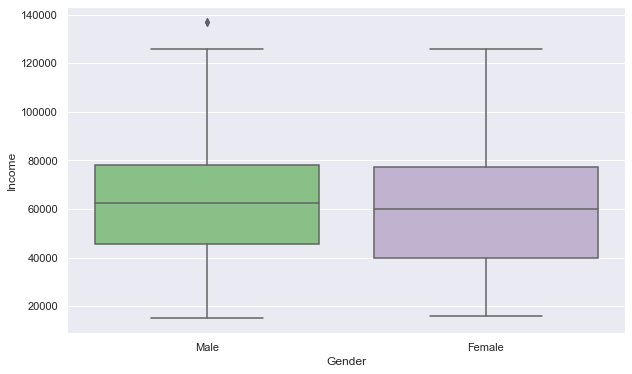

In [546]:
ax = sns.boxplot(data = df, 
                 x = 'Gender', 
                 y = 'Income', 
                 palette = 'Accent')

#### 3.2.2. Observations:
* These is not a significant difference between the genders.
* Women earn slightly less than men
* There is a wider spread of income between men and women and women earn less than men overall

### 3.3. Boxplot to evaluate the age differences between male and female shoppers


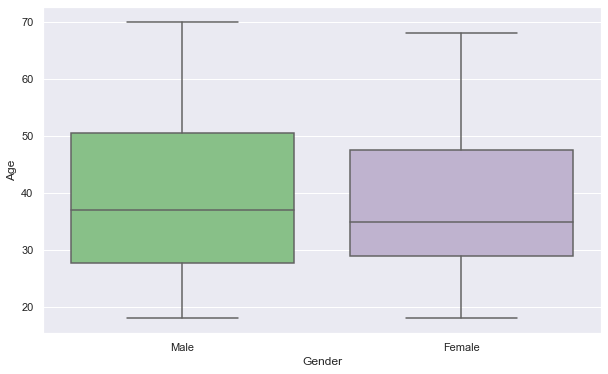

In [547]:
ax = sns.boxplot(data = df, 
                 x = 'Gender', 
                 y = 'Age', 
                 palette = 'Accent')

#### 3.3.1. Observations:
* There is a wider age spread of men compared to women.
* The mean age of women shoppers in less than that of men.
* There are more older male shoppers than female.
* The youngest and oldest shoppers are men


### 3.4. Boxplot to evaluate the differences in spending scores between male and female shoppers

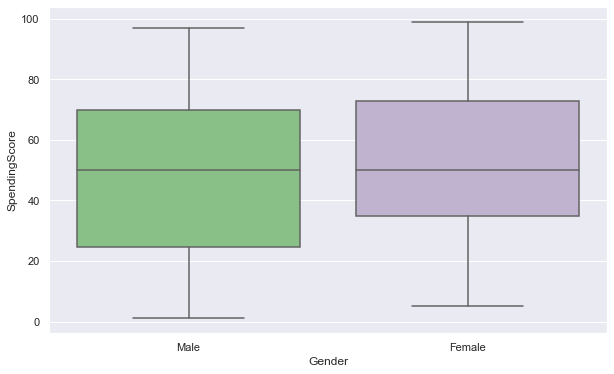

In [548]:
ax = sns.boxplot(data = df, 
                 x = 'Gender', 
                 y = 'SpendingScore', 
                 palette = 'Accent')

#### 3.4.1. Observations:
* There is not a significant difference between men and women.
* Women shoppers tend to spend more than men.

### 3.5. Correlation between age and income
#### 3.5.1. Scatterplot to evaluate the relationship betweeen age and income

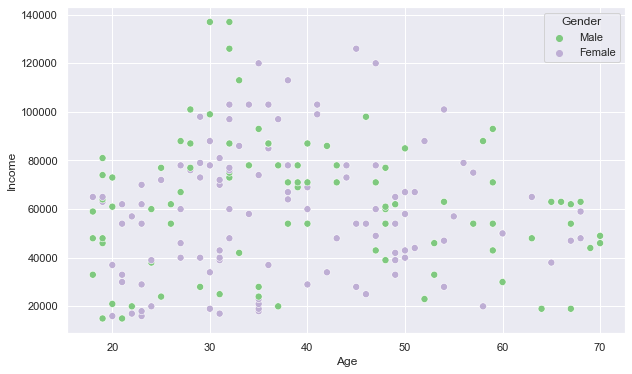

In [549]:
ax = sns.scatterplot(data = df,
                     x = 'Age', 
                     y = 'Income', 
                     palette= 'Accent',
                     s = 50,  
                     hue="Gender")


#### 3.5.2. Pearson correlation coefficient between age and income

In [550]:
pc1 = pearsonr(df['Age'], df['Income'])
pc1

PearsonRResult(statistic=-0.012398042736060134, pvalue=0.8616748930180701)

####  3.5.2.1. Observations:
Pearson correlation coefficient (r) = `-0.0124`indicates a <span style="color:red">**NO correlation**</span> between  age `Age`and income `Income`
 
Two-tailed p-value (p) = `0.8617`being greater than the level of significance ` p > 0.05` indicates that there is <span style="color:red">**not a statistically significant association**</span>  between between  age `Age`and income `Income`

### 3.6. Correlation between age and spending score
#### 3.6.1. Scatterplot to evaluate the relationship between age and spending score

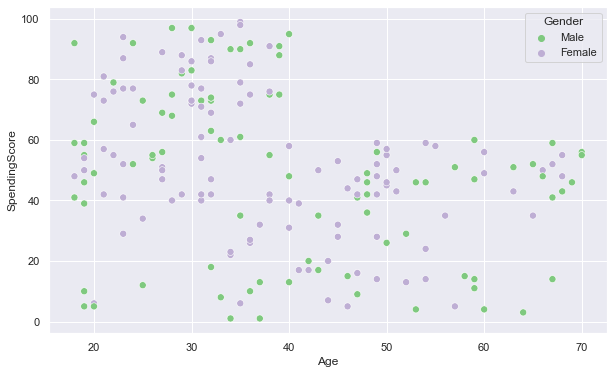

In [551]:
ax = sns.scatterplot(data = df, 
                     x = 'Age', 
                     y = 'SpendingScore',
                     palette= 'Accent',
                     hue="Gender",
                     s = 50)

#### 3.6.2. Pearson correlation coefficient between age and spending score

In [552]:
pc2 = pearsonr(df['Age'], df['SpendingScore'])
pc2

PearsonRResult(statistic=-0.32722684603909, pvalue=2.2502957035653357e-06)

####  3.6.3. Observations:
Pearson correlation coefficient (r) = `-0.3272`indicates a <span style="color:red">** weak negative correlation**</span> between  age `Age`and income `SpendingScore`
 
Two-tailed p-value (p) = `2.2503`being greater than the level of significance ` p > 0.05` indicates that there is <span style="color:red">**not a statistically significant association**</span>  between between  age `Age`and `SpendingScore`

### 3.7. Correlation between income and spending score
#### 3.7.1. Scatterplot to evaluate the relationship betweeen income and spending score

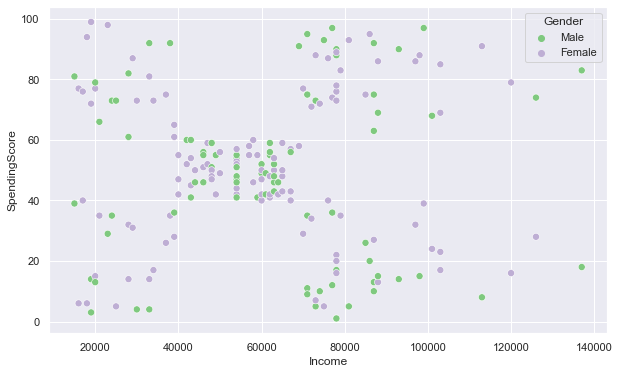

In [553]:
ax = sns.scatterplot(data = df, 
                     x = 'Income', 
                     y = 'SpendingScore',
                palette= 'Accent',
                    hue="Gender",
                     s = 50)

#### 3.7.2. Pearson correlation coefficient between income and spending score

In [554]:
pc3 = pearsonr(df['Income'], df['SpendingScore'])
pc3

PearsonRResult(statistic=0.00990284809403762, pvalue=0.8893134370274359)

####  3.7.3. Observations:
Pearson correlation coefficient (r) = `0.0099`indicates a <span style="color:red">**NO correlation**</span> between  age `Income`and income `SpendingScore`.
 
Two-tailed p-value (p) = `0.8893`being greater than the level of significance ` p > 0.05` indicates that there is <span style="color:red">**not a statistically significant association**</span>  between between  age `Income`and `SpendingScore`.

In the scatterplot it is possible  to get a sense of possibly five or six obvious clusters.

There is a significant difference in the range of values between income and spending  score.


## 4. Prepare the Data

### 4.1. Return the summary statistics for the Income and SpendingScore columns

To resolve the wide range in income and spending score return the summary statistics of `Income` and `SpendingScore` using the .describe() method. Only return the two fields not the entire data frame.

In [555]:
df[['Income', 'SpendingScore']].describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,60560.00,50.20
std,26264.72,25.82
min,15000.00,1.00
25%,41500.00,34.75
50%,61500.00,50.00
75%,78000.00,73.00
max,137000.00,99.00


#### 4.1.2. Observations:
* The standard deviation for `Income` is ` 26264.72` which illustrates a significant range in the income data that will need to be resolved.
* The standard deviation for `SpendingScore` is ` 26264.72` which illustrates a significant range in the data spending score that will need to be resolved.
* k-means clustering uses Euclidean distance to quantify similarity. The problem with these two fields is left as they are now the income feature will dominate the distance calculations and spending score will have little if any impact on the clustering process.
* The resolution to this problem is to normalise (or standardise) the data in these two fields.
* Standardisation rescales the two fields `Income` and `SpendingScore` to have a mean of 0 and a standard deviation of 1.

Source (Frederick Nwanganga):https://www.linkedin.com/learning/machine-learning-with-python-k-means-clustering/how-to-segment-data-with-k-means-clustering-in-python?


### 4.2. Normalise (or standardise) the data in the Income and SpendingScore fields.

Use the scaler.fit_transform method from the sklearn.preprocessing subpackage to standerdise the `Income` and `SpendingScore` fields.


In [556]:
dfs = scaler.fit_transform(df[['Income', 'SpendingScore']])
print(dfs[0:5]) # print the first five elements in the array

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


The scaler transformation returns a NumPy array that needs to be converted to a data frame (for convenience).

In [557]:
dfs = pd.DataFrame(dfs, columns = ['Income', 'SpendingScore'])

In [558]:
dfs.describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


### 4.3. The standardised values in both Income and SpendingScore.
Reviewing the data frame above note that both `Income` and `SpendingScore` now have a standard deviation of one and a mean of zero. The approach is Z-score normalization.


## 5. Create the Clusters
To cluster the data using k-means clustering it is necessary to add the appropriate python packages.  
Import the k-means class from the sklearn.cluster subpackage.

In [559]:
from sklearn.cluster import KMeans

### 5.1. Setting up the k-means clustering algorithm
Create a new object called `kmeans` from the k-means class.  
k-means requires three arguments:  
* 1. ` n_clusters` argument determines the number of clusters. In the example it is set to 3.  
* 2. ` n_init` this argument sets the number of times the k-means algorithm should be run with different central seeds. The default is 10. Set here to 25. 
* 3. `random_state` this argument sets the random initialisation seed which will be used to generate the cluster centres to 1, 2, 3, 4. Using this argument enables the reproduction of the results.  


In [560]:
kmeans = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

#### 5.1.1. Use the fit method
* Use the fit method of the kmeans object to cluster the data.   

In [561]:
kmeans.fit(dfs)

KMeans(n_clusters=3, n_init=25, random_state=1234)

### 5.2. Assign reference labels
*  get `cluster assignments` reference the labels attributes of the km object.  
* Cluster assignments correspond to the order of instances in the customer scale data set.  
* Output is a NumPy array of cluster assignments. 

In [562]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### 5.2.1. Notes about labels
Cluster assignments correspond to the order of instances in the customer scale data frame. 
For example:
* first item in the output array (also the first item in the dataset) is assigned to cluster 0
* second last item is assigned to cluster 1
* the last item in the array is in cluster 2.


### 5.3. Using the inertia_ attribute in the k-means sub package
The output of this code is the total `WCSS (within-cluster sum of squares)` for the clusters.


In [563]:
kmeans.inertia_

157.70400815035947

## 6. Evaluate and Visualise the Clusters 
Count the number of items in each cluster

In [564]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0    123
1     38
2     39
dtype: int64

### 6.1. Comparing cluster size
The first cluster is disproportionately larger than the other two clusters and will need further attention bring more balance to the clusters.  
It is possible that the initial number of clusters is not appropriate for this data set.
The centre of each cluster will provide useful information about the quality of the clusters.

### 6.2. Return the coordinates of the centroids
The cluster_centers attribute returns the coordinates of the centroids (cluster centres) as a NumPy array.


In [565]:
kmeans.cluster_centers_

array([[-0.62618966, -0.01439238],
       [ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275]])

#### 6.2.1. Convert the NumPy array to a data frame 

In [566]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, 
                               columns = ['Income', 'SpendingScore'])
cluster_centers

,Income,SpendingScore
0,-0.626190,-0.014392
1,1.009200,-1.225535
2,0.991583,1.239503


#### 6.2.2. Understanding the coordinates of the centroids
  
The *Z-score* approach was used to standardise the data therefore the  coordinates for the average income and average spending score will be zero.  
  
  
**Z-score normalisation** is the process of normalising every value in a feature so that the average (mean) of all the feature’s values equals zero and the standard deviation is one.  
  
(*Source Z-score normalisation:* https://www.statology.org/z-score-normalization/)
  
**First cluster centroid** Therefore examining the numbers for the first cluster centroid `(labelled 0)`  indicates that customers in this cluster have a slightly lower than average income `-0.626190` and about average spending scores `-0.014392`.  
  
**Second cluster centroid** The numbers for the second cluster centroid `(labelled 1)`  indicate that customers in this cluster have higher than average income `1.00919971` but lower than average spending scores ` -1.22553537`.   
  
**Third cluster centroid** The numbers for the third cluster centroid `(labelled 2)`  indicate that customers in this cluster have higher than average income `0.99158305` higher than average spending scores `1.23950275`.  
  

#### 6.2.3 Visualise the clusters and cluster centroids with scatter plots.

Parameters for the first scatter plot - customer scale data:
x = `Income`
y = `SpendingScore` 
hue = `cluster labels` 
colour transparency  (alpha) = 0.8
size of plot points s = 50


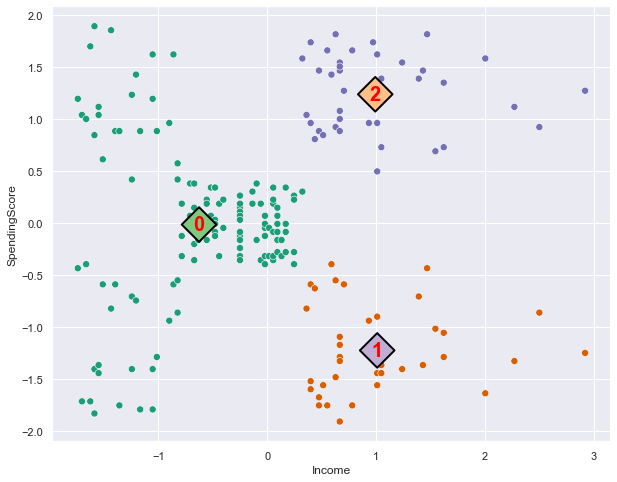

In [567]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = dfs,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = kmeans.labels_, 
                     palette= 'Dark2',
                     #alpha = 0.8, not required with the Accent palette 
                     s = 50,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'Accent', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 20,
                        weight = 'bold',
                        color = 'red')

#### 6.2.4. Evaluation of the centroid scatterplot
Examining the scatterplot indicates that `cluster 0` could be partitioned further possibly into two clusters.   
This confirms the findings in `Section 6.1` 


## 7. Choose the right number of Clusters

### 7.1. Using statistical measures to calculate the appropriate number of clusters

*Within Cluster Sum of Squares (WCSS)
*Average Silhouette Score
*Calinski Harabasz Score


### 7.2. The Within Cluster Sum of Squares (WCSS)
This approach is also known as the “Elbow method”  

Approach used:
* Create and empty list `wcss`
* Iterate values for k from 2 to 10. (*Note:* stop value in the range function, 11 is exclusive)
* For each `k`, cluster the data (as done in `Section 5.1` and `5.1.1.` but note that the value for the number of clusters is `k`).
* The second last step in the iteration `(kmeans.inertia_)` calculates the `wcss value` for each iteration
* The last step in the iteration appends the `wcss value` to the `wcss` list.

**Note:** after irritating all nine k values, the `wcss` list will contain the `wcss value` for each `k` in the list.

* When the loop is completed convert the wcss list into a Pandas Series

Create a line plot with
* y-axis = wcss
* x-axis = k values


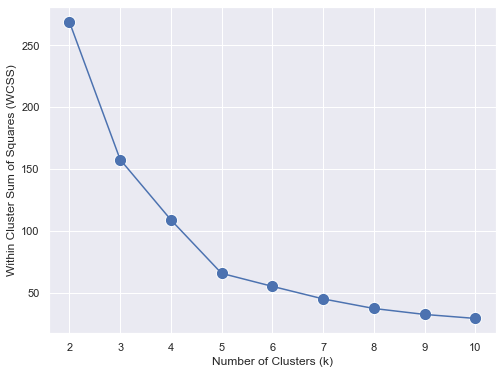

In [568]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    kmeans.fit(dfs)
    wcss.append(kmeans.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

#### 7.2.1. Observation

Examining the plot the elbow is at `k = 5` (it is at this point that increasing the value of `k` no longer reduces WCSS significantly.


### 7.3. The Average Silhouette Score

Approach used:  
* Create and empty list `silhouette`
* Iterate values for k from 2 to 10. (Note: stop value in the range function, 11 is exclusive)
* For each k, cluster the data (as done in Section 5.1 and 5.1.1. but note that the value for the number of clusters is `k`)
* The second last step in the iteration `( silhouette_score)` calculates the average `silhouette_score` for each k during each iteration
* The last step in the iteration appends the `silhouette_score`.

**Note:** after irritating all nine k values, the `silhouette` list will contain the `silhouette_score` for each k in the list.

* When the loop is completed convert the `silhouette` list into a Pandas Series

Create a line plot with:
* y-axis = silhouette score
* x-axis = k values


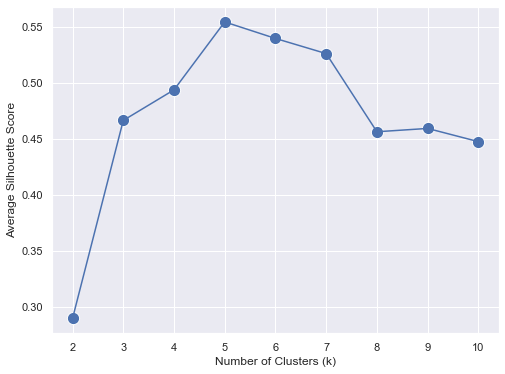

In [569]:
silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    kmeans.fit(dfs)
    silhouette.append(silhouette_score(dfs, kmeans.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')


#### 7.3.1 Observations

With the average silhouette method, the k value corresponding to the highest average silhouette score represents the optimal number of clusters. 

Examining the chart reveals that the values peak  when `k = 5`. This k value is the same as the `WCSS k value`.


### 7.4. The Calinski Harabasz Score

Approach used:  
* Create and empty list `chs`
* Iterate values for k from 2 to 10. (Note: stop value in the range function, 11 is exclusive)
* For each k, cluster the data (as done in Section 5.1 and 5.1.1. but note that the value for the number of clusters is `k`)
* The second last step in the iteration `( calinski_harabasz_score)` calculates the `calinski_harabasz_score` for each k during each iteration
* The last step in the iteration appends the `calinski_harabasz_score` to the list `chs`

**Note:** after irritating all nine k values, the `chs` list will contain the `calinski_harabasz_score` for each k in the list.

* When the loop is completed convert the `chs` list into a Pandas Series

Create a line plot with
* y-axis = Calinski Harabasz Score
* x-axis = k values



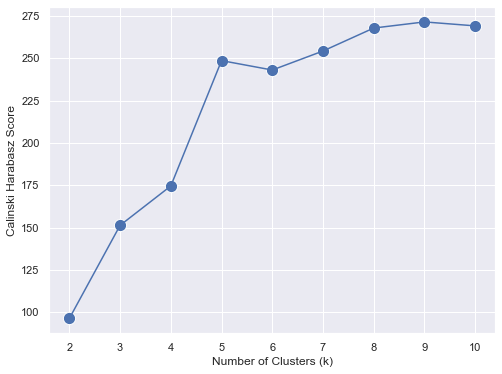

In [570]:
chs = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    kmeans.fit(dfs)
    chs.append(calinski_harabasz_score(dfs, kmeans.labels_))

calinski_series = pd.Series(chs, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')


#### 7.4.1. Observations

Using the Calinski-Harabasz score, the optimal value for k is that which corresponds to either the highest score or the first abrupt elbow in the chart. 

* The first abrupt elbow is when `k = 5`.
* The highest score is when `k = 9`.

Results of the three tests
* Within Cluster Sum of Squares (WCSS): `k = 5`.
* Silhouette Score: `k = 5`.
* Calinski-Harabasz score: `k = 5` or `k = 9`.

Considering that the `WCSS` and `Silhouette` both returned `k = 5` and the `Calinski-Harabasz` is `k = 5` or `k = 9`.

The optimal k value confirmed by all three tests is when `k = 5`.


## 8. Analyze and Interpret the Clusters

### 8.1. Adjusting the k-means clustering algorithm
Create a new object called `kmeans` from the k-means class.  
k-means requires three arguments:  
* 1. ` n_clusters` argument determines the number of clusters. The correct number of clusters based on the three tests above (`WCSS`, `Silhouette` and `Calinski-Harabasz`) set `k = 5`.  
* 2. ` n_init` this argument sets the number of times the k-means algorithm should be run with different central seeds. The default is 10. Set it to 25 (just to be sure). 
* 3. `random_state` this argument sets the random initialisation seed which will be used to generate the cluster centres to 1, 2, 3, 4. Using this argument enables the reproduction of the results.  


In [571]:
kmeans = KMeans(n_clusters = 5, n_init = 25, random_state = 1234)

#### 8.1.1. Use the fit method
* Use the fit method of the kmeans object to cluster the data.   

In [572]:
kmeans.fit(dfs)

KMeans(n_clusters=5, n_init=25, random_state=1234)

#### 8.1.2. Create a data frame for the cluster centroids
Create a data frame for the cluster centroids called `cluster_centers`.

In [573]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['Income', 'SpendingScore'])

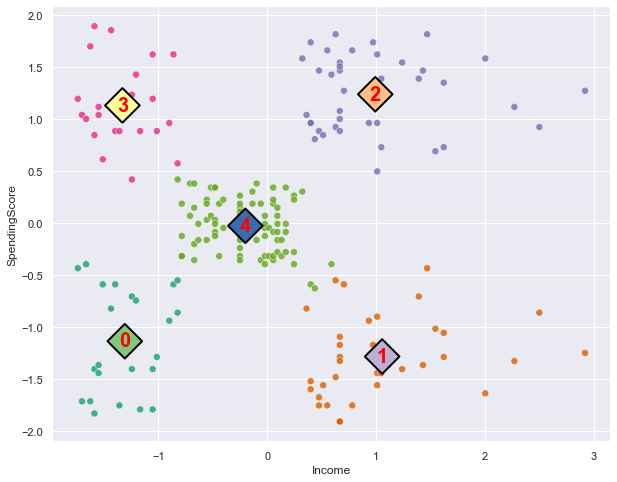

In [574]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = dfs,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = kmeans.labels_, 
                     palette = 'Dark2', 
                     alpha = 0.8, 
                     s = 50,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'Accent', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)


# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                          horizontalalignment='center',
                        verticalalignment='center',
                        size = 20,
                        weight = 'bold',
                        color = 'red')

#### 8.1.3. Observations

*The chart now displays five clusters instead of the initial three. The previous `cluster 0` has been transformed into three clusters namely `cluster 0`, `cluster 3` and `cluster 4`. 
*`cluster 1` and `cluster 2` have remained basically the same as the previous iteration.


### 8.2. Assigning cluster numbers to the original data

* Create a new column in the dataset to hold the cluster assignment.
* Assign the cluster numbers to the customers in the original data frame.
* The next step is the analyze the the characteristics of each segment.

In [575]:
df['Cluster'] = kmeans.labels_.tolist()
df.head(10)

,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,3
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,3
4,5,Female,31,17000,40,0
5,6,Female,22,17000,76,3
6,7,Female,35,18000,6,0
7,8,Female,23,18000,94,3
8,9,Male,64,19000,3,0
9,10,Female,30,19000,72,3


### 8.3. Setting up the original data frame for cluster analysis

* The `gender` feature is categorical with text which is not helpful.
* Dummy code the `gender` feature to two new features `Gender_Female` and `Gender_Male`.


In [576]:
df = pd.get_dummies(df, columns = ['Gender'])
df.head(10)

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15000,39,0,0,1
1,2,21,15000,81,3,0,1
2,3,20,16000,6,0,1,0
3,4,23,16000,77,3,1,0
4,5,31,17000,40,0,1,0
5,6,22,17000,76,3,1,0
6,7,35,18000,6,0,1,0
7,8,23,18000,94,3,1,0
8,9,64,19000,3,0,0,1
9,10,30,19000,72,3,1,0


### 8.4. Return descriptive statistics for each feature
* Return descriptive statistics for Gender, Age, Income  and SpendingScore features.

In [577]:
df.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

Gender_Female        0.56
Gender_Male          0.44
Age                 36.00
Income           61500.00
SpendingScore       50.00
dtype: float64

### 8.5. Return descriptive statistics for each cluster
* Return descriptive statistics for each features, but grouped by cluster. 


In [578]:
dfg = df.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)
dfg

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.46,0.54,42.0,85000.0,16.0
2,0.54,0.46,32.0,79000.0,83.0
3,0.59,0.41,23.5,24500.0,77.0
4,0.59,0.41,46.0,54000.0,50.0


### 8.6 Conclusion and Observations


In [579]:
dfg['Gender_Female'] = dfg['Gender_Female'] *100
dfg['Gender_Male'] = dfg['Gender_Male'] *100
dfg[['Gender_Male', 'Gender_Female','Income','SpendingScore']] = dfg[['Gender_Male', 'Gender_Female','Income','SpendingScore']].astype('int64')
dfg

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,61,39,46.0,25000,17
1,46,54,42.0,85000,16
2,54,46,32.0,79000,83
3,59,41,23.5,24500,77
4,59,41,46.0,54000,50


#### 8.6.1. Observations

* Cluster 0: older (mostly women), earn and spend less than the other clusters. 
* Cluster 1: slightly younger than cluster 0, slightly more men, `earn the most` and spend the least.
* Cluster 2: younger but not the youngest,slightly more women who `earn well` (2nd highest earners) and `spend the most`.
* Cluster 3: `youngest` (more women) who earn the least and are `second highest spenders`.
* Cluster 4: oldest (mostly women), who are in the middle in terms of earning and spending habits. 


<table>
<thead>
<tr><th>Cluster</th><th>Majority_Sex</th><th>Avg_Age</th><th>Income</th><th>Spending</th></tr>
</thead>
<tbody>
<tr><td>0</td><td>Female</td><td>46</td><td>2nd lowest</td><td>2nd lowest</td></tr>
<tr><td>1</td><td>Male</td><td>42</td><td>Highest</td><td>Lowest</td></tr>
<tr><td>2</td><td>Female</td><td>32</td><td>2nd Highest</td><td>Highest</td></tr>
<tr><td>2</td><td>Female</td><td>23.5</td><td>Lowest</td><td>2nd Highest</td></tr>
<tr><td>4</td><td>Female</td><td>46</td><td>Middle</td><td>Middle</td></tr>
</tbody>
</table>

#### 8.6.2. Recomendations
Focus attention on: 
* Cluster 1 who are the highest earners but the lowest spenders.
* Cluster 2 are the best customers – keep them happy.
* Monitor Cluster 3 who are the biggest spenders but who earn the least.
* Four of the five clusters are women who the bigger audience. Marketing should consider how best to tailor messages, that appeal to women shoppers, and particularly the younger women in cluster 3.


## END